In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [3]:
data = pd.read_csv('NORMAL_DLY_sample_csv.csv')

In [4]:
print(data.columns)

Index(['STATION', 'STATION_NAME', 'ELEVATION', 'LATITUDE', 'LONGITUDE', 'DATE',
       'DLY-TMIN-NORMAL', 'DLY-TMAX-NORMAL', 'MTD-PRCP-NORMAL'],
      dtype='object')


In [5]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')

In [14]:
data['TAVG'] = ((data['DLY-TMIN-NORMAL'] / 10) + (data['DLY-TMAX-NORMAL'] / 10)) / 2

In [23]:
data['PRCP'] = (data['MTD-PRCP-NORMAL'] / 254).fillna(0)

In [46]:
print((data['DLY-TMAX-NORMAL'] / 10).max())
data['Extreme_Heat'] = (data['DLY-TMAX-NORMAL'] / 10) > 80
print((data['DLY-TMIN-NORMAL'] / 10).min())
data['Extreme_Cold'] = (data['DLY-TMIN-NORMAL'] / 10) < 20
data['Heavy_Rain'] = data['PRCP'] > 1

80.5
-4.8


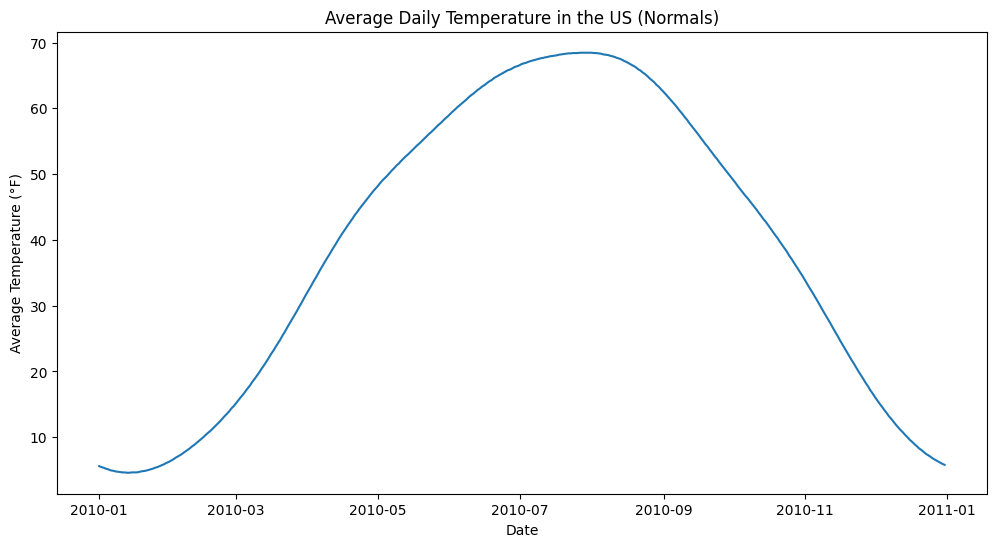

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='TAVG', data=data)
plt.title('Average Daily Temperature in the US (Normals)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°F)')
plt.show()

# This plot shows the average daily temperature across the US throughout the year, highlighting seasonal variations.

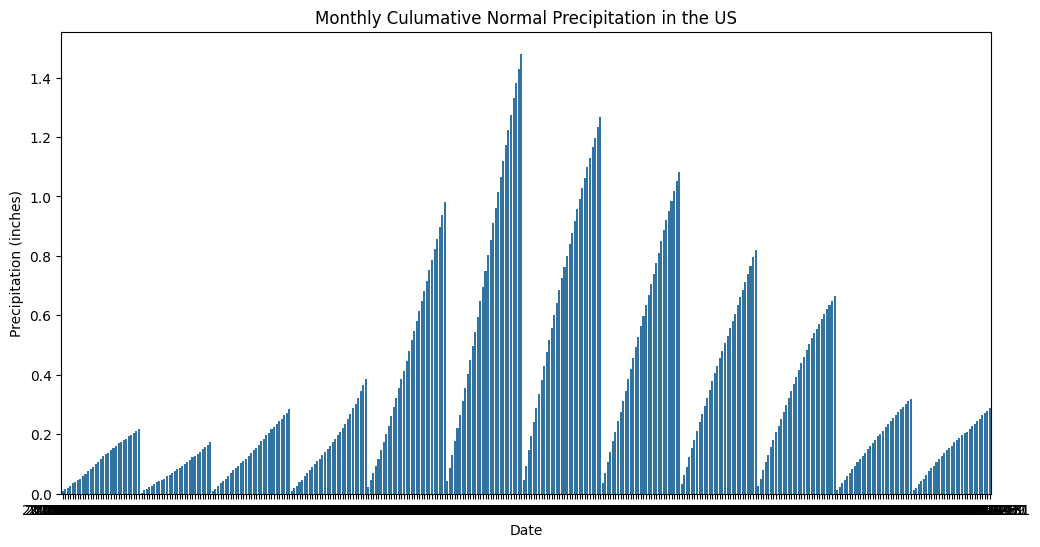

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(x='DATE', y='PRCP', data=data)
plt.title('Monthly Culumative Normal Precipitation in the US')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.show()

# This plot displays the normal monthly culumative precipitation in the US. Each month it adds each day previously and at the very end of the month it resets.

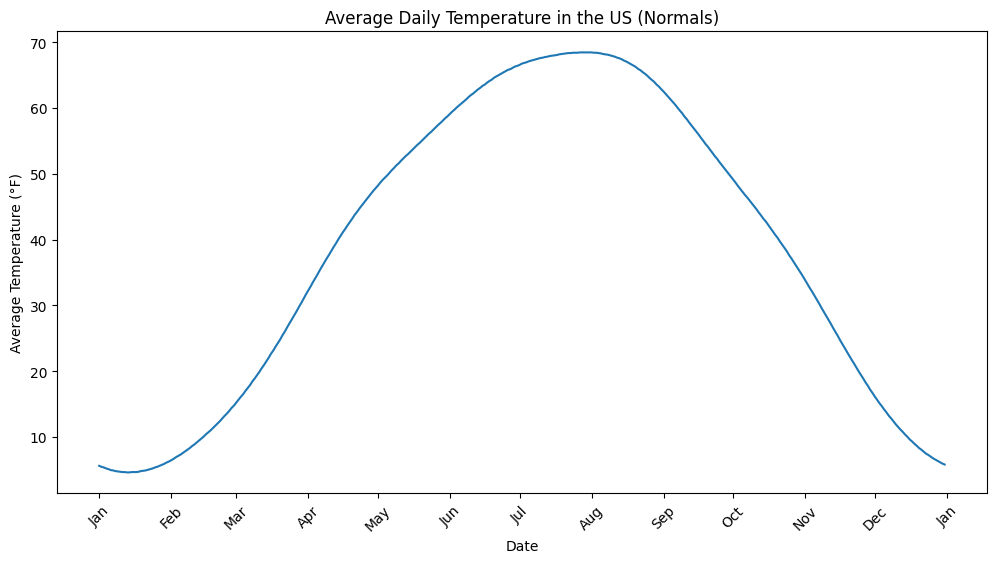

In [16]:
plt.figure(figsize=(12,6))
plt.plot(data['DATE'], data['TAVG'], marker='', linestyle='-')
plt.title('Average Daily Temperature in the US (Normals)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°F)')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=45)

plt.show()

# This plot shows the average daily temperature across the US with months labeled

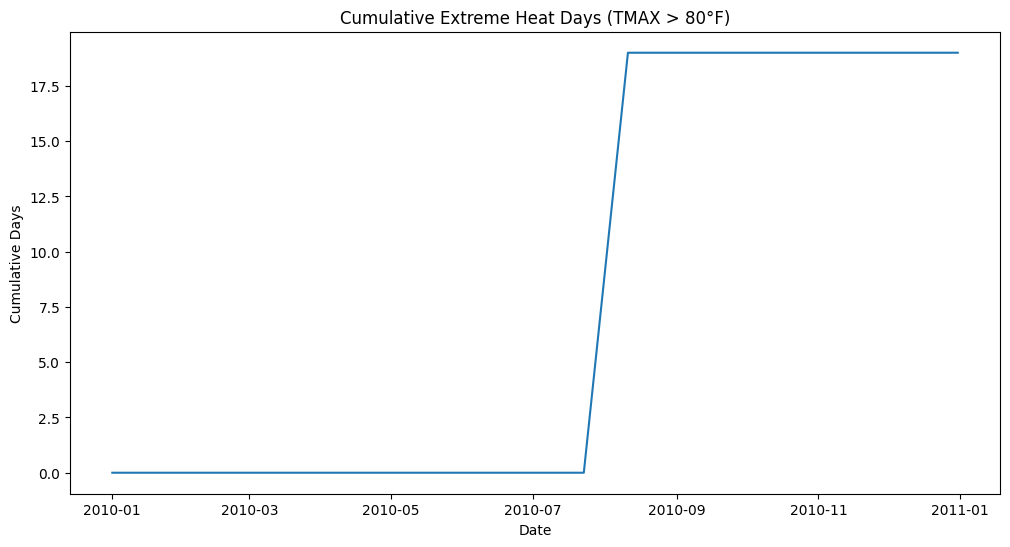

In [43]:
data['Cumulative_Heat'] = data['Extreme_Heat'].cumsum()
plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='Cumulative_Heat', data=data)
plt.title('Cumulative Extreme Heat Days (TMAX > 80°F)')
plt.xlabel('Date')
plt.ylabel('Cumulative Days')
plt.show()

# This plot shows the cumulative number of days where the daily maximum temperature goes past 80°F, showing times of extreme heat.

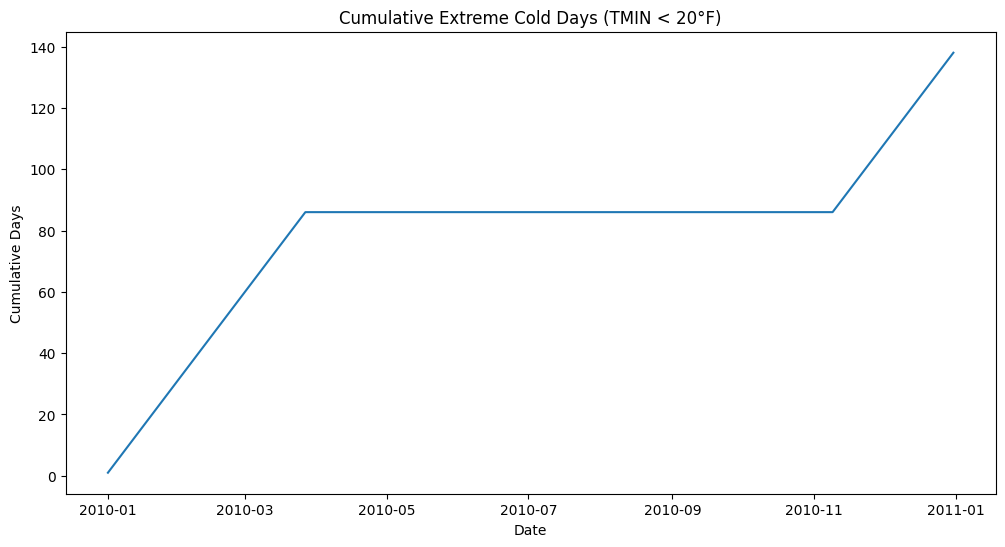

In [48]:
data['Cumulative_Cold'] = data['Extreme_Cold'].cumsum()

plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='Cumulative_Cold', data=data)
plt.title('Cumulative Extreme Cold Days (TMIN < 20°F)')
plt.xlabel('Date')
plt.ylabel('Cumulative Days')
plt.show()

# This plot shows the cumulative number of days where the daily minimum temperature gets below 20°F, showing times of extreme cold.
